In [ ]:
!pip install -q tflite-model-maker
!pip install -q pycocotools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.3/577.3 KB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 91.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 KB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.6/128.6 KB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 KB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.

In [ ]:
import numpy as np
import os

from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

import tensorflow as tf
     

/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [ ]:
# Choose an object detection model archiecture
spec = model_spec.get('efficientdet_lite0')
     



In [ ]:
import os
cwd = os.getcwd()

In [ ]:
!curl -L "https://universe.roboflow.com/ds/XRFQn0K808?key=d2eQkYIh5g" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip


Streaming output truncated to the last 5000 lines.
 extracting: train/8212_jpg.rf.d73c8c08f7e185ea7b792a7af97c3a61.xml  
 extracting: train/8214_jpg.rf.8a376fc564d9fbb9e28fc74185f2e762.jpg  
 extracting: train/8214_jpg.rf.8a376fc564d9fbb9e28fc74185f2e762.xml  
 extracting: train/8215_jpg.rf.c8d4c989caf0f98e24be0fe5a40a5980.jpg  
 extracting: train/8215_jpg.rf.c8d4c989caf0f98e24be0fe5a40a5980.xml  
 extracting: train/8217_jpg.rf.a5cb7f09ea163039e9f29fd252b89963.jpg  
 extracting: train/8217_jpg.rf.a5cb7f09ea163039e9f29fd252b89963.xml  
 extracting: train/8218_jpg.rf.a81ac3e97d1da6fd15efedaf61521104.jpg  
 extracting: train/8218_jpg.rf.a81ac3e97d1da6fd15efedaf61521104.xml  
 extracting: train/8220_jpg.rf.d342557a648902d64e744cea42f21375.jpg  
 extracting: train/8220_jpg.rf.d342557a648902d64e744cea42f21375.xml  
 extracting: train/8221_jpg.rf.cf0d127418380ee2bf8250a959071994.jpg  
 extracting: train/8221_jpg.rf.cf0d127418380ee2bf8250a959071994.xml  
 extracting: train/8222_jpg.rf.2b608b87

In [ ]:
cwd

'/content'

In [ ]:
!ls

README.dataset.txt  README.roboflow.txt  sample_data  test  train  valid


In [ ]:
# Load the dataset
CLASSES = ['1', '2', '3', '4', '5', '6']
TRAIN_DATASET_PATH = f'{cwd}/train'
VALID_DATASET_PATH = f'{cwd}/valid'
TEST_DATASET_PATH = f'{cwd}/test'

train_data = object_detector.DataLoader.from_pascal_voc(
    TRAIN_DATASET_PATH,
    TRAIN_DATASET_PATH,
    CLASSES
)

val_data = object_detector.DataLoader.from_pascal_voc(
    VALID_DATASET_PATH,
    VALID_DATASET_PATH,
    CLASSES
)

test_data = object_detector.DataLoader.from_pascal_voc(
    TEST_DATASET_PATH,
    TEST_DATASET_PATH,
    CLASSES
)


In [ ]:
# Train the TensorFlow model with the training data
# example https://colab.research.google.com/github/tensorflow/tensorflow/blob/master/tensorflow/lite/g3doc/models/modify/model_maker/object_detection.ipynb
model = object_detector.create(train_data, model_spec=spec, batch_size=8, train_whole_model=True, validation_data=val_data,epochs=350)

Epoch 1/50
  6/875 [..............................] - ETA: 2:14 - det_loss: 2.4604 - cls_loss: 1.2358 - box_loss: 0.0245 - reg_l2_loss: 0.0637 - loss: 2.5240 - learning_rate: 0.0080 - gradient_norm: 2.2788

875/875 [==============================] - 188s 170ms/step - det_loss: 1.2929 - cls_loss: 0.7577 - box_loss: 0.0107 - reg_l2_loss: 0.0649 - loss: 1.3578 - learning_rate: 0.0090 - gradient_norm: 4.4064 - val_det_loss: 1.1260 - val_cls_loss: 0.6184 - val_box_loss: 0.0102 - val_reg_l2_loss: 0.0662 - val_loss: 1.1922
Epoch 2/50
875/875 [==============================] - 146s 167ms/step - det_loss: 0.8799 - cls_loss: 0.5074 - box_loss: 0.0075 - reg_l2_loss: 0.0672 - loss: 0.9471 - learning_rate: 0.0100 - gradient_norm: 3.6786 - val_det_loss: 1.8342 - val_cls_loss: 1.1455 - val_box_loss: 0.0138 - val_reg_l2_loss: 0.0681 - val_loss: 1.9024
Epoch 3/50
875/875 [==============================] - 147s 168ms/step - det_loss: 0.7510 - cls_loss: 0.4349 - box_loss: 0.0063 - reg_l2_loss: 0.0688 - loss: 0.8198 - learning_rate: 0.0099 - gradient_norm: 3.1890 - val_det_loss: 0.7982 - val_cls_loss: 0.5612 - val_box_loss: 0.0047 - val_reg_l2_loss: 0.0694 - val_loss: 0.8677
Epoch 4/50
875/875 [=============

In [ ]:
model.evaluate(test_data)


16/16 [==============================] - 24s 697ms/step



{'AP': 0.46456453,
 'AP50': 0.7972874,
 'AP75': 0.48340693,
 'APs': 0.16422348,
 'APm': 0.53735626,
 'APl': 0.7030401,
 'ARmax1': 0.42170116,
 'ARmax10': 0.5668442,
 'ARmax100': 0.60551274,
 'ARs': 0.41182327,
 'ARm': 0.65445584,
 'ARl': 0.7808378,
 'AP_/1': 0.7186517,
 'AP_/2': 0.22934845,
 'AP_/3': 0.30866322,
 'AP_/4': 0.4344353,
 'AP_/5': 0.3949888,
 'AP_/6': 0.70129967}

In [ ]:
model.export(export_dir='.')


In [ ]:
model.summary()

Model: ""
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    multiple                  3234464   
                                                                 
 class_net/class-predict (Se  multiple                 4086      
 parableConv2D)                                                  
                                                                 
 box_net/box-predict (Separa  multiple                 2916      
 bleConv2D)                                                      
                                                                 
Total params: 3,241,466
Trainable params: 3,194,330
Non-trainable params: 47,136
_________________________________________________________________


In [ ]:
model.evaluate_tflite('model.tflite', test_data)

1000/1000 [==============================] - 2586s 3s/step



{'AP': 0.44220603,
 'AP50': 0.78198284,
 'AP75': 0.4390079,
 'APs': 0.16490526,
 'APm': 0.50665975,
 'APl': 0.63227993,
 'ARmax1': 0.41447112,
 'ARmax10': 0.5103852,
 'ARmax100': 0.5235353,
 'ARs': 0.2944136,
 'ARm': 0.5724459,
 'ARl': 0.66371024,
 'AP_/1': 0.70112956,
 'AP_/2': 0.21567783,
 'AP_/3': 0.2837169,
 'AP_/4': 0.40952405,
 'AP_/5': 0.37124106,
 'AP_/6': 0.6719468}

In [ ]:
from google.colab import files
files.download("/content/model.tflite")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# https://colab.research.google.com/github/tensorflow/tensorflow/blob/master/tensorflow/lite/g3doc/models/modify/model_maker/object_detection.ipynb#scrollTo=ZQpahAIBqBPp

In [ ]:
model.summary()

Model: ""
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    multiple                  3234464   
                                                                 
 class_net/class-predict (Se  multiple                 4086      
 parableConv2D)                                                  
                                                                 
 box_net/box-predict (Separa  multiple                 2916      
 bleConv2D)                                                      
                                                                 
Total params: 3,241,466
Trainable params: 3,194,330
Non-trainable params: 47,136
_________________________________________________________________


In [ ]:
#@title Load the trained TFLite model and define some visualization functions

import cv2

from PIL import Image

model_path = 'model.tflite'

# Load the labels into a list
classes = ['???'] * model.model_spec.config.num_classes
label_map = model.model_spec.config.label_map
for label_id, label_name in label_map.as_dict().items():
  classes[label_id-1] = label_name

# Define a list of colors for visualization
COLORS = np.random.randint(0, 255, size=(len(classes), 3), dtype=np.uint8)

def preprocess_image(image_path, input_size):
  """Preprocess the input image to feed to the TFLite model"""
  img = tf.io.read_file(image_path)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.uint8)
  original_image = img
  resized_img = tf.image.resize(img, input_size)
  resized_img = resized_img[tf.newaxis, :]
  resized_img = tf.cast(resized_img, dtype=tf.uint8)
  return resized_img, original_image


def detect_objects(interpreter, image, threshold):
  """Returns a list of detection results, each a dictionary of object info."""

  signature_fn = interpreter.get_signature_runner()

  # Feed the input image to the model
  output = signature_fn(images=image)

  # Get all outputs from the model
  count = int(np.squeeze(output['output_0']))
  scores = np.squeeze(output['output_1'])
  classes = np.squeeze(output['output_2'])
  boxes = np.squeeze(output['output_3'])

  results = []
  for i in range(count):
    if scores[i] >= threshold:
      result = {
        'bounding_box': boxes[i],
        'class_id': classes[i],
        'score': scores[i]
      }
      results.append(result)
  return results


def run_odt_and_draw_results(image_path, interpreter, threshold=0.5):
  """Run object detection on the input image and draw the detection results"""
  # Load the input shape required by the model
  _, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']

  # Load the input image and preprocess it
  preprocessed_image, original_image = preprocess_image(
      image_path,
      (input_height, input_width)
    )

  # Run object detection on the input image
  results = detect_objects(interpreter, preprocessed_image, threshold=threshold)

  # Plot the detection results on the input image
  original_image_np = original_image.numpy().astype(np.uint8)
  for obj in results:
    # Convert the object bounding box from relative coordinates to absolute
    # coordinates based on the original image resolution
    ymin, xmin, ymax, xmax = obj['bounding_box']
    xmin = int(xmin * original_image_np.shape[1])
    xmax = int(xmax * original_image_np.shape[1])
    ymin = int(ymin * original_image_np.shape[0])
    ymax = int(ymax * original_image_np.shape[0])

    # Find the class index of the current object
    class_id = int(obj['class_id'])

    # Draw the bounding box and label on the image
    color = [int(c) for c in COLORS[class_id]]
    cv2.rectangle(original_image_np, (xmin, ymin), (xmax, ymax), color, 2)
    # Make adjustments to make the label visible for all objects
    y = ymin - 15 if ymin - 15 > 15 else ymin + 15
    label = "{}: {:.0f}%".format(classes[class_id], obj['score'] * 100)
    cv2.putText(original_image_np, label, (xmin, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

  # Return the final image
  original_uint8 = original_image_np.astype(np.uint8)
  return original_uint8

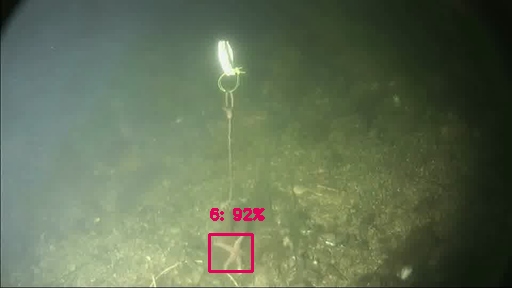

In [ ]:
#@title Run object detection and show the detection results

# URL 1 - https://dl3.pushbulletusercontent.com/J7QeceVyDpTitBKvJST7wN26CkK7sSM0/11989.jpg
# URL 2 - https://dl3.pushbulletusercontent.com/bhl431EALpjXmtIPIK4Afj3PzPJ3wGN0/11308.jpg
# URL 3 - https://dl3.pushbulletusercontent.com/SSVGgz1bxcbSjyvnlyrCtbR8KzzNqqFl/1153.jpg

INPUT_IMAGE_URL = "https://dl3.pushbulletusercontent.com/SSVGgz1bxcbSjyvnlyrCtbR8KzzNqqFl/1153.jpg" #@param {type:"string"}
DETECTION_THRESHOLD = 0.3 #@param {type:"number"}

TEMP_FILE = '/tmp/image.png'

!wget -q -O $TEMP_FILE $INPUT_IMAGE_URL
im = Image.open(TEMP_FILE)
im.thumbnail((512, 512), Image.ANTIALIAS)
im.save(TEMP_FILE, 'PNG')

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Run inference and draw detection result on the local copy of the original file
detection_result_image = run_odt_and_draw_results(
    TEMP_FILE,
    interpreter,
    threshold=DETECTION_THRESHOLD
)

# Show the detection result
Image.fromarray(detection_result_image)

In [ ]:

import os
import random

# Set the path to the folder containing the images
folder_path = '/content/test'

# Get a list of all files in the folder
file_list = os.listdir(folder_path)

# Filter the list to only include files with the .jpg extension
jpg_list = [file for file in file_list if file.endswith('.jpg')]

# Pick 10 random images from the list
random_images = random.sample(jpg_list, 10)

# Print the list of selected images
print(random_images)




['5159_jpg.rf.3c33311d5ef6771074759c2bf2f13b97.jpg', '6769_jpg.rf.874746c03cd67f19a55d7719ef191e39.jpg', '8905_jpg.rf.dc985e8940c2ab62893f357ce2de46d5.jpg', '11981_jpg.rf.eb1fbcfe0e7e5fecd45c906278025b9b.jpg', '13082_jpg.rf.60ce0bd814d249e2bf65b2704a4cf8a8.jpg', '5312_jpg.rf.0d16f74b35671672af088b4f3e4f4eb7.jpg', '3422_jpg.rf.feadfa0e39779887e0e973639de40d14.jpg', '14410_jpg.rf.487e53affbb470b3c4838af2e9302f70.jpg', '3443_jpg.rf.e60c4a200bfe6dea4107f64315e64b1b.jpg', '4345_jpg.rf.140529b5bfdcc99733bc34f322e44541.jpg']


In [ ]:
import time
for eachimage in random_images:
  eachimage = "/content/test/"+eachimage
  im = Image.open(eachimage)
  im.thumbnail((512, 512), Image.ANTIALIAS)
  im.save(eachimage, 'PNG')

  # Load the TFLite model
  interpreter = tf.lite.Interpreter(model_path=model_path)
  interpreter.allocate_tensors()

  # Run inference and draw detection result on the local copy of the original file
  detection_result_image = run_odt_and_draw_results(
      eachimage,
      interpreter,
      threshold=DETECTION_THRESHOLD
  )

  # Show the detection result
  im = Image.fromarray(detection_result_image)
  im.save("predicted"+str(time.time())+".jpg")

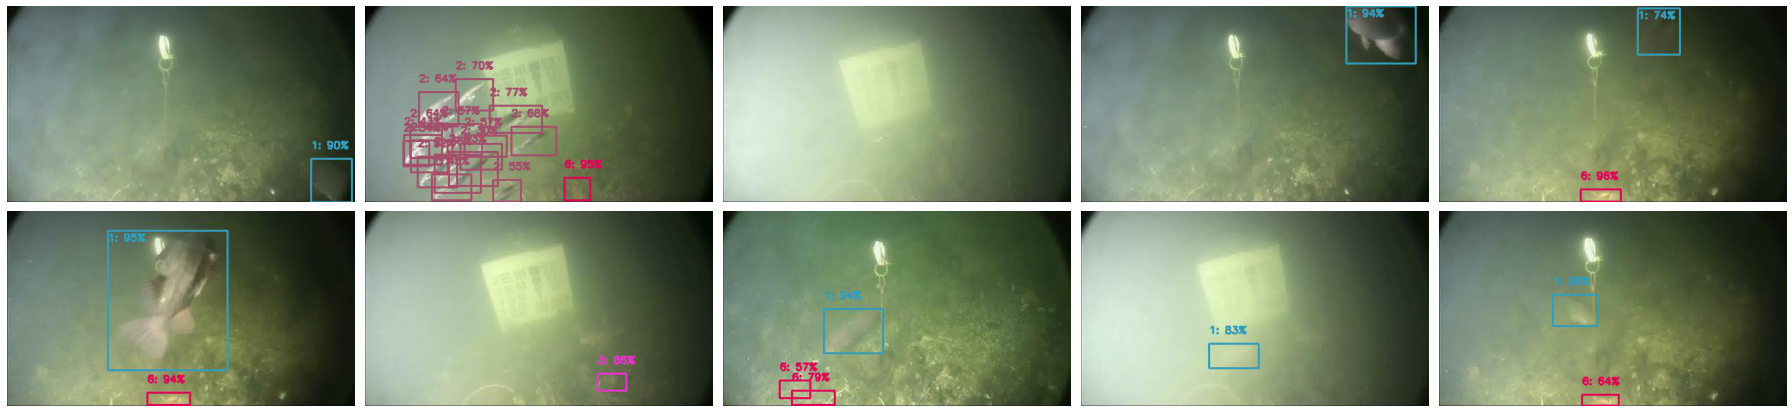

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Set the number of rows and columns in the grid
nrows = 2
ncols = 5

# Get a list of all files in the current directory
file_list = os.listdir()

# Filter the list to only include files with the .jpg extension
jpg_list = [file for file in file_list if file.endswith('.jpg')]

# Set the figure size and create a new figure
fig = plt.figure(figsize=(25, 6))

# Iterate over each image and display it in the grid
for i, file in enumerate(jpg_list):
    # Load the image and add it to the figure subplot
    img = Image.open(file)
    fig.add_subplot(nrows, ncols, i+1)
    plt.imshow(img)
    plt.axis('off')

# Show the grid of images
plt.tight_layout()
plt.show()
